### Классификация и построение модели

Начнем с подгрузки основных библиотек и загрузки базы данных

In [210]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [211]:
df_src = pd.read_csv("heart_cleveland_upload.csv", index_col=0)

Теперь посмотрю на основную информацию

In [212]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 69 to 35
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        297 non-null    int64  
 1   cp         297 non-null    int64  
 2   trestbps   297 non-null    int64  
 3   chol       297 non-null    int64  
 4   fbs        297 non-null    int64  
 5   restecg    297 non-null    int64  
 6   thalach    297 non-null    int64  
 7   exang      297 non-null    int64  
 8   oldpeak    297 non-null    float64
 9   slope      297 non-null    int64  
 10  ca         297 non-null    int64  
 11  thal       297 non-null    int64  
 12  condition  297 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 32.5 KB


In [213]:
df_src

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,,,,,,,,,,,,,
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
35,1,3,120,198,0,0,130,1,1.6,1,0,2,1


Итак у нас есть парочка признаков и целевая переменная condition, которая либо 1 либо 0. 1 - был приступ, 2 - не было. 
Описание признаков:

age - возраст (в годах)

sex - пол (1 = мужской, 0 = женский)

cp - тип боли в груди (1: типичная ангина, 2: атипичная ангина, 3: неангинальная боль, 4: асимптоматично)

trestbps - артериальное давление в состоянии покоя (в мм рт.ст.)

chol - уровень холестерина в сыворотке (в мг/дл)

fbs - уровень сахара в крови натощак (1: > 120 мг/дл, 0: <= 120 мг/дл)

restecg - результаты электрокардиограммы в состоянии покоя (0: норма, 1: наличие ST-T изменений, 2: вероятная или подтвержденная гипертрофия левого желудочка)

thalach - максимальная достигнутая частота сердечных сокращений

exang - наличие стенокардии при физической нагрузке (1: да, 0: нет)

oldpeak - депрессия сегмента ST при нагрузке относительно покоя

slope - наклон пика упражнения ST сегмента (1: восходящий, 2: плоский, 3: нисходящий)

ca - количество крупных сосудов, окрашенных флуороскопией (0-3)

thal - дефект таллия (3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект)

condition (целевая переменная) - диагноз сердечного заболевания (0 = отсутствие, 1 = наличие)

Куча категориальных признаков и пара числовых. Два из которых я понимаю как интерпретировать, а один не совсем. chol и trestpbs - мне весьма понятны, а вот thalach - не очень понятно при каких условиях была достигнута эта частота. Может пациент во время ношения холтера или перед экг выпил 5 классических монстров, поднялся на 10 этаж и выкурил сигаретку. Не понятно... 

Ладно пойду по тем признакам, которые понял

Сначала дисбаланс

In [214]:
df_src["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

На всякий случай проверить надо, мало ли....

In [215]:
df_src["condition"].unique()

array([0, 1], dtype=int64)

Ладно вроде все нормально. 
Теперь можно построить модель без всякой предобработки очистки и т.д. Чтобы посмотреть, вдруг модель идеально предсказывает итак

## Построение модели

In [216]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score,f1_score,confusion_matrix,classification_report,roc_auc_score
def print_classification_metrics(y_true, y_pred):
    print(f"recall {recall_score(y_true, y_pred)}")
    print(f"precision {precision_score(y_true, y_pred)}")
    print(f"f1 score {f1_score(y_true, y_pred)}")
    print(f"Accuracy {accuracy_score(y_true,y_pred)}")
    print(f"CM matrix{confusion_matrix(y_true, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.2f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    

In [217]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df_train, df_test = train_test_split(df_src, test_size=0.3, stratify=df_src["condition"], random_state=RANDOM_SEED)

y_train = df_train.pop("condition")
y_test = df_test.pop("condition")

target_enc = LabelEncoder()
target_enc.fit(y_train)

y_train_enc = target_enc.transform(y_train)
y_test_enc = target_enc.transform(y_test)

log_model = LogisticRegression(random_state=RANDOM_SEED)
log_model.fit(df_train, y_train_enc)

y_pred = log_model.predict(df_test)

print_classification_metrics(y_test_enc, y_pred)

recall 0.8095238095238095
precision 0.918918918918919
f1 score 0.8607594936708861
Accuracy 0.8777777777777778
CM matrix[[45  3]
 [ 8 34]]
ROC AUC: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        48
           1       0.92      0.81      0.86        42

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ну такие неплохие результаты можно попробовать улучшить еще. Не знаю на сколько это вообще возможно. 

In [218]:
for y_p, y_t in zip(y_pred, y_test_enc):
    if y_t != y_p:
        print(f"Predict {y_p} vs True {y_t}")

Predict 1 vs True 0
Predict 1 vs True 0
Predict 0 vs True 1
Predict 0 vs True 1
Predict 0 vs True 1
Predict 1 vs True 0
Predict 0 vs True 1
Predict 0 vs True 1
Predict 0 vs True 1
Predict 0 vs True 1
Predict 0 vs True 1


Есть пациенты в которых модель ошибается, попробую все таки посмотреть на данные и корреляцию

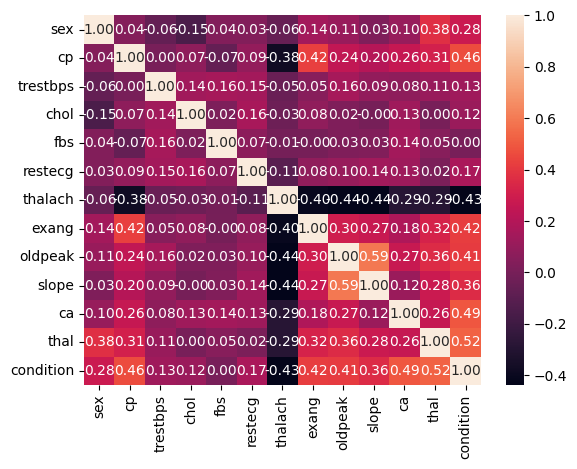

In [219]:
sns.heatmap(df_src.corr(method="spearman"), annot=True, fmt=".2f")
plt.show()

Ну оно и понятно, большая часть признаков - категориальные признаки

Ладно приступим к анализу:

Сначала воспользуюсь L1 регуляцией, чтобы определить наиболее важные признаки (но на самом деле избавиться от бесполезных)

In [220]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV


def Lasso_alpha_selection(data):
    # Разделение данных на обучающую и тестовую выборки
    data_train, data_test = train_test_split(data, test_size=0.3, stratify=data["condition"], random_state=RANDOM_SEED)
    
    # Извлечение целевой переменной
    y_train = data_train.pop("condition")
    x_train = data_train

    y_test = data_test.pop("condition")
    x_test = data_test

    # Определение диапазона значений alpha для подбора
    alpha_values = np.logspace(-4, 1, 50)  # От 0.0001 до 10, 50 значений

    # Настройка модели Lasso для GridSearchCV
    lasso = Lasso()
    param_grid = {'alpha': alpha_values}

    # Использование GridSearchCV для подбора альфа
    grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5)
    grid_search.fit(x_train, y_train)

    # Лучший параметр alpha
    best_alpha = grid_search.best_params_['alpha']
    print(f'Лучший alpha: {best_alpha}')

    # Обучение модели с лучшим alpha
    best_lasso_model = Lasso(alpha=best_alpha)
    best_lasso_model.fit(x_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = best_lasso_model.predict(x_test)

    # Вывод коэффициентов
    coefficients = pd.Series(best_lasso_model.coef_, index=x_train.columns)
    print("Коэффициенты Lasso с лучшим alpha:")
    print(coefficients)

    significant_coefficients = coefficients[abs(coefficients) > 0.1]
    print("\nЗначимые коэффициенты:")
    print(significant_coefficients)

Lasso_alpha_selection(df_src)

Лучший alpha: 0.005428675439323859
Коэффициенты Lasso с лучшим alpha:
sex         0.065260
cp          0.064239
trestbps    0.001010
chol        0.000314
fbs        -0.000000
restecg    -0.000000
thalach    -0.002786
exang       0.151254
oldpeak     0.056467
slope       0.015570
ca          0.149024
thal        0.111758
dtype: float64

Значимые коэффициенты:
exang    0.151254
ca       0.149024
thal     0.111758
dtype: float64


Видимо сахар и результат кардио в состоянии покоя покидают этот проект:)
Оно и видно на графике ниже где я анализирую уже. Хотя то чем я занимаюсь сейчас тоже вроде анализ...

## Анализ

Оценим граифик

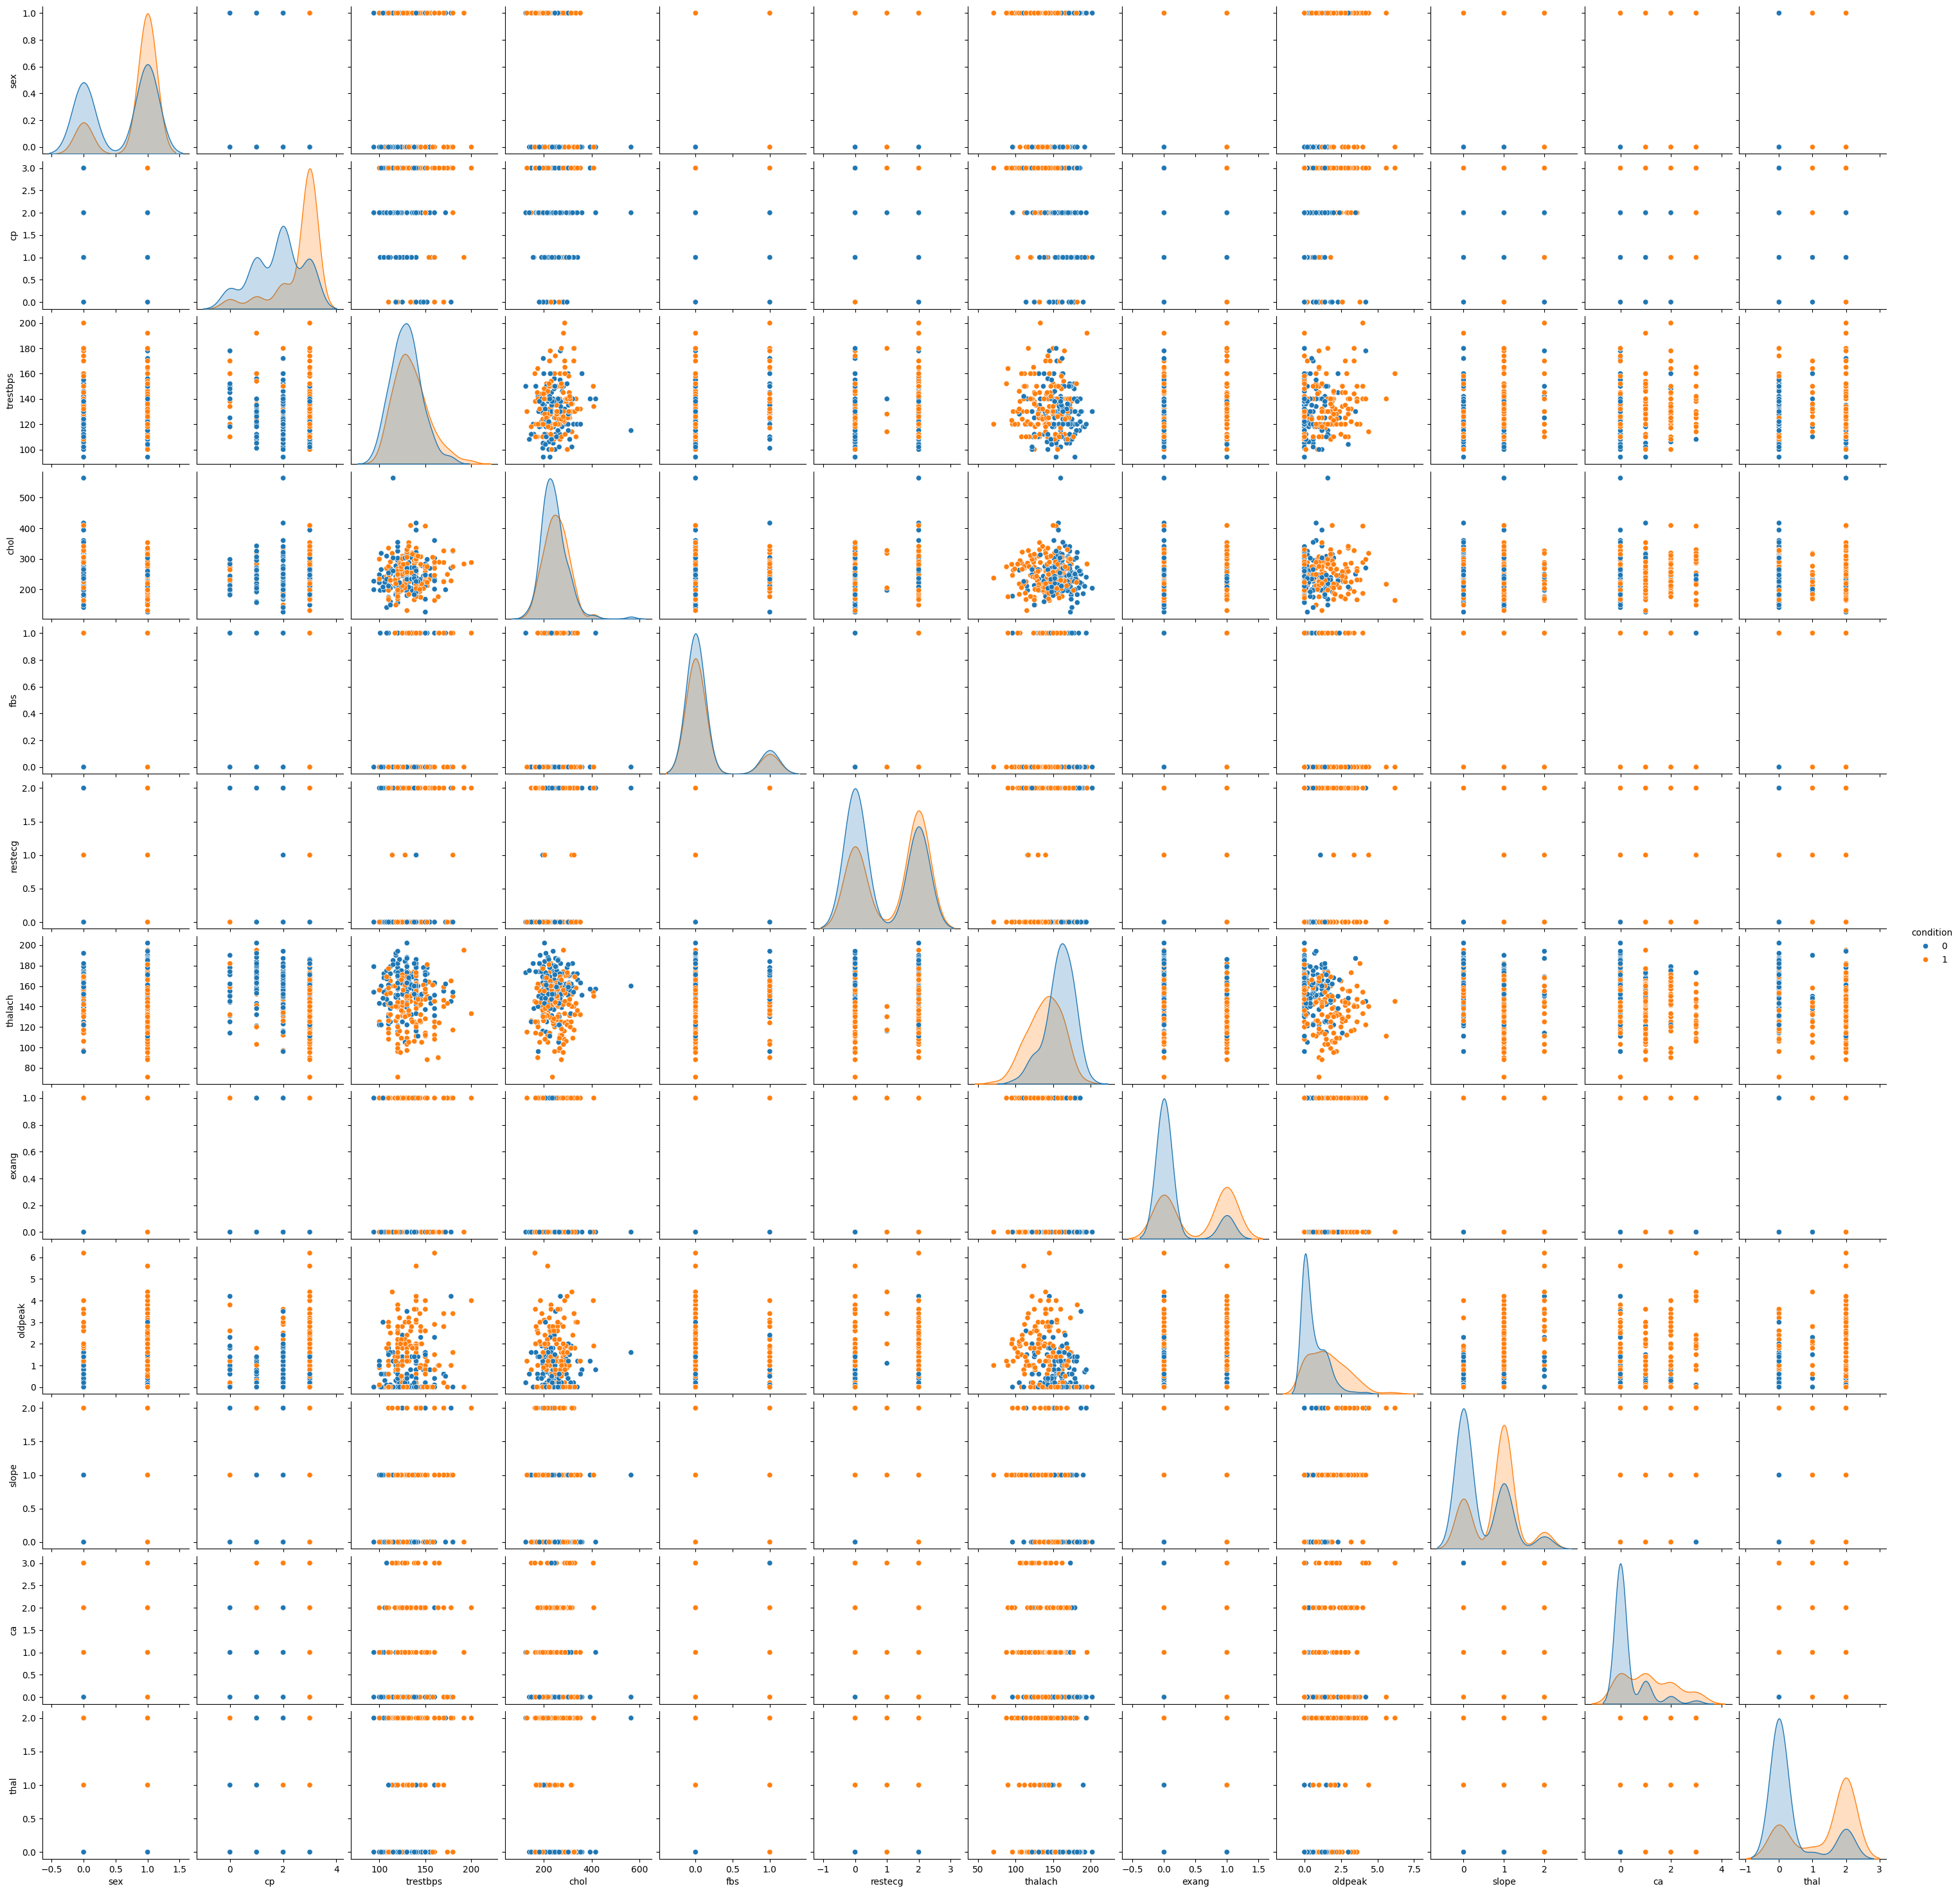

In [221]:
sns.pairplot(df_src, hue="condition")
plt.show()

По сути видно то же что и предсказала L1

## посмотрим на графики некоторых признаков

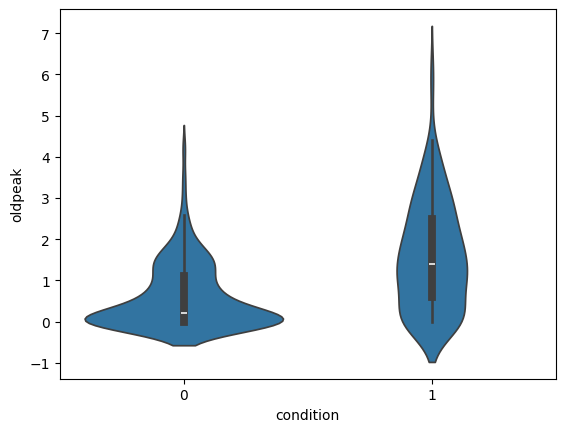

In [222]:
sns.violinplot(data=df_src, x="condition", y="oldpeak")
plt.show()


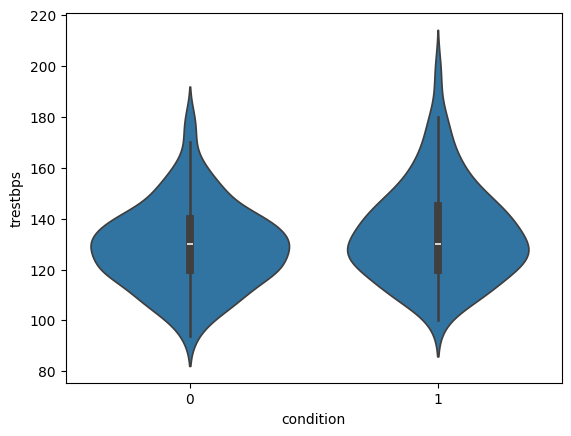

In [223]:
sns.violinplot(data=df_src, x="condition", y="trestbps")
plt.show()

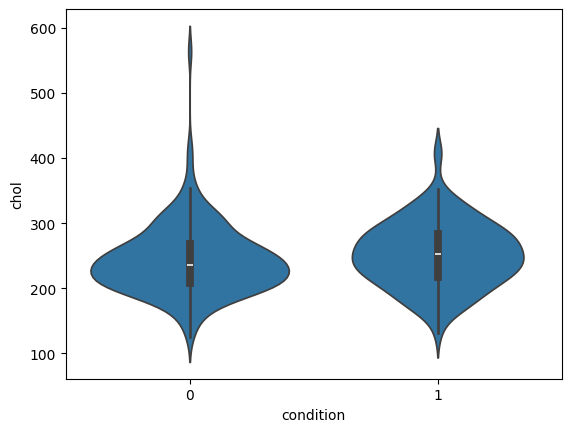

In [224]:
sns.violinplot(data=df_src, x="condition", y="chol")
plt.show()

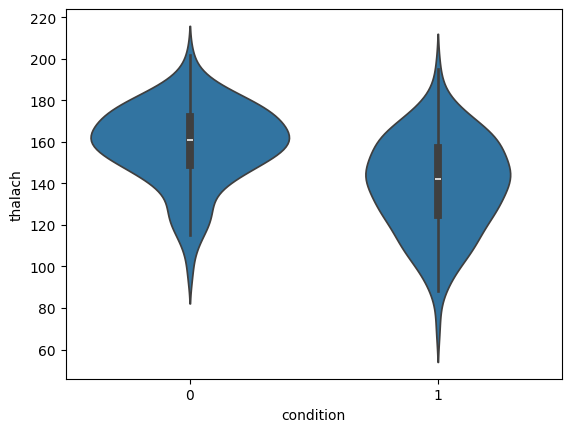

In [225]:
sns.violinplot(data=df_src, x="condition", y="thalach")
plt.show()

Очевидно, что тут ничего хитрого не придумать(

Однако можно создать категориальные признаки, которые улучшат метрики. По графикам можно заметить, что thalach и exang при определенных значениях дают преобладание целевой переменной в единице (диагноз имеется). По графикам thalach это >150, exang > 0.4. Также можно докинуть признак на какой нибудь cp где тоже видно перевес. Сделать его исключительно в качестве флага

Пора теперь реализовать это все в предобработке

## Предобработка

In [232]:
# Добавим признак high_risk и high_risk2, и удалим строки, удаление которых было оговоренно выше
df_src['high_risk'] = (df_src['thalach'] > 150) & (df_src['exang'] > 0.4)
df_src['high_risk'] = df_src['high_risk'].astype(int)
df_src['high_risk2'] = (df_src['cp'] < 2)
df_src['high_risk2'] = df_src['high_risk2'].astype(int)
df_new_src = df_src.drop(["fbs","slope","restecg","oldpeak"],axis=1) #ладно restecg и oldpeak я удалил потому что они мне показались мультиколлинеарными, когда смотрел на таблицу корреляций

Сделаю класс предобработки. Не стал его заново переписывать, взял из своего же 14 ноутбука и немного подкорректировал

In [228]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import pandas as pd


class DataPreprocessing:
    def __init__(self):
        self.scaler = MinMaxScaler()
        self.min_val = None
        self.max_val = None
        self.standard_scaler = StandardScaler()  # Для Z-преобразования
        self.power_transformer = PowerTransformer(method='yeo-johnson')  # Для Yeo-Johnson 
        self.target_columns = ['trestbps', 'chol', 'thalach']

    def fit(self, df) -> None:
        df_copy = df.copy()
        # Масштабируем только указанные признаки
        self.scaler.fit(df_copy[self.target_columns])
        
        # Сохраняем минимум и максимум для использования в transform
        self.min_val = self.scaler.data_min_
        self.max_val = self.scaler.data_max_

    def transform(self, df) -> pd.DataFrame:
        df_copy = df.copy()
        # Масштабируем только указанные признаки
        df_scaled = self.scaler.transform(df_copy[self.target_columns])
        df_copy[self.target_columns] = df_scaled
        return df_copy

Теперь посмотрим на метрики модели

In [234]:
df_train, df_test = train_test_split(df_new_src, test_size=0.3, stratify=df_src["condition"], random_state=RANDOM_SEED)

data_preprocessor = DataPreprocessing()

# Обучение на обучающей выборке
data_preprocessor.fit(df_train)
data_transformed_train_el = data_preprocessor.transform(df_train)
data_transformed_test_el = data_preprocessor.transform(df_test)

# Преобразование обучающей выборки
y_train1 = data_transformed_train_el.pop("condition")  # Удаляем целевую переменную
X_train1 = data_transformed_train_el

# Преобразование тестовой выборки
y_test1 = data_transformed_test_el.pop('condition')  # Удаляем целевую переменную
X_test1 = data_transformed_test_el

log_model = LogisticRegression(random_state=RANDOM_SEED)
log_model.fit(X_train1, y_train1)

y_pred = log_model.predict(data_transformed_test_el)

print_classification_metrics(y_test1, y_pred)
df_new_src

recall 0.8571428571428571
precision 0.9230769230769231
f1 score 0.8888888888888888
Accuracy 0.9
CM matrix[[45  3]
 [ 6 36]]
ROC AUC: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        48
           1       0.92      0.86      0.89        42

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



,sex,cp,trestbps,chol,thalach,exang,ca,thal,condition,high_risk,high_risk2
age,,,,,,,,,,,
69,1,0,160,234,131,0,1,0,0,0,1
69,0,0,140,239,151,0,2,0,0,0,1
66,0,0,150,226,114,0,0,0,0,0,1
65,1,0,138,282,174,0,1,0,1,0,1
64,1,0,110,211,144,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
40,1,3,152,223,181,0,0,2,1,0,0
39,1,3,118,219,140,0,0,2,1,0,0
35,1,3,120,198,130,1,0,2,1,0,0


Стало получше. Честно, что сделать дальше я уже не знаю. Щас попробую перекинуть с recall на precision немного засчет изменения порога функции активации. И наверное все

In [264]:
y_probs = log_model.predict_proba(data_transformed_test_el)
def predict_threshold(y_probs, threshold):
        return (y_probs[:, 1] >= threshold).astype(int)
y_pred_06 = predict_threshold(y_probs, 0.4)
print_classification_metrics(y_test1, y_pred_06)

recall 0.8809523809523809
precision 0.8604651162790697
f1 score 0.8705882352941177
Accuracy 0.8777777777777778
CM matrix[[42  6]
 [ 5 37]]
ROC AUC: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.86      0.88      0.87        42

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



Здесь возникает двоякая ситуация. По сути метрики лучше с порогом в 0.5, однако! В нашем случае параметр recall стал больше после уменьшения порога до 0.4.
Почему это важно? потому что параметр recall отвечает за долю истинно положительных результатов, а мы диагностируем заболевания сердца. Поэтому здесь важно именно значение параметра recall. С другой стороны можно тогда вообще всем ставить диагноз сердечных заболеваний скрутив порог до нуля. Поэтому тут можно утверждать о том, что искомое значние порога в границах 0.4-0.5. Лучшие метрики показывает при 0.5, можно немного пожертвовать ими ради увеличения вероятности истинно положительного результата, а можно остановиться на 0.857. Хотя эти цифры ничего не значат для спасения одной жизни, метрики все еще остаются неплохие, а человеку поставили вовремя диагноз.